In [ ]:
!pip install -U scikit-learn
!pip install wordcloud
!pip install --user -U nltk
!pip install pandas

     |████████████████████████████████| 1.5 MB 6.8 MB/s 
     |████████████████████████████████| 749 kB 44.8 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# Fundamentals
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import NLTK to use its functionalities on texts
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# We will visualize the messages with a word cloud
from wordcloud import WordCloud

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
data = pd.read_csv('train.csv', delimiter=';', names = ['text', 'label'])

In [ ]:
# Display firt five rows
display(data.head())

# Display the summary statistics
display(data.describe())

# Print the info
print(data.info())

,text,label
0,text,label
1,republican committee pass bill would prohibit ...,0
2,trump treasury candidate bank accuse discrimin...,1
3,guess behind sicken ad show boy bully dad vote...,0
4,michigan treasurer call quick action detroit s...,1


,text,label
count,36533,36533
unique,32588,3
top,highlight trump presidency april pm edt gmt fr...,1
freq,7,18266


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36533 entries, 0 to 36532
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36533 non-null  object
 1   label   36533 non-null  object
dtypes: object(2)
memory usage: 571.0+ KB
None


0        label
1            0
2            1
3            0
4            1
         ...  
36528        1
36529        1
36530        1
36531        1
36532        1
Name: label, Length: 36533, dtype: object

1        0.499986
0        0.499986
label    0.000027
Name: label, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


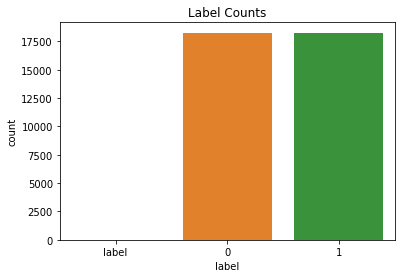

In [ ]:
# Print the counts of each category
print(data['label'])
print()

# Print the proportions of each category
print(data['label'].value_counts(normalize=True))

# Visualize the Categories
sns.countplot(data['label'])
plt.title("Label Counts")
plt.show()

label
0        249.164459
1        234.083050
label      1.000000
Name: word_count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


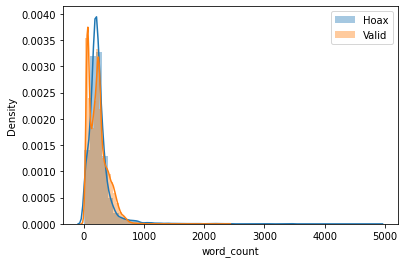

In [ ]:
# Store the number of words in each messages
data['word_count'] = data['text'].str.split().str.len()

# Print the average number of words in each category
print(data.groupby('label')['word_count'].mean())

# Visualize the distribution of word counts in each category
sns.distplot(data[data['label'] == '0']['word_count'], label='Hoax')
sns.distplot(data[data['label'] == '1']['word_count'], label='Valid'),
plt.legend()
plt.show()

In [ ]:
# Select the features and the target
x = data['text']
y = data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

In [ ]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(x_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(x_test)

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
print("Accuracy:", nb.score(tfidf_test, y_test))

Accuracy: 0.9369098125085534


In [ ]:
# Predict the labels
y_pred = nb.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

Confusion Matrix

[[3329  287]
 [ 174 3517]]


Classification Report

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3616
           1       0.92      0.95      0.94      3691

    accuracy                           0.94      7307
   macro avg       0.94      0.94      0.94      7307
weighted avg       0.94      0.94      0.94      7307


ROC AUC Score: 0.9367444174780558


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)
